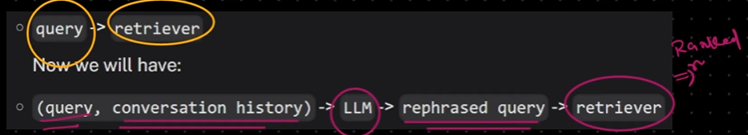

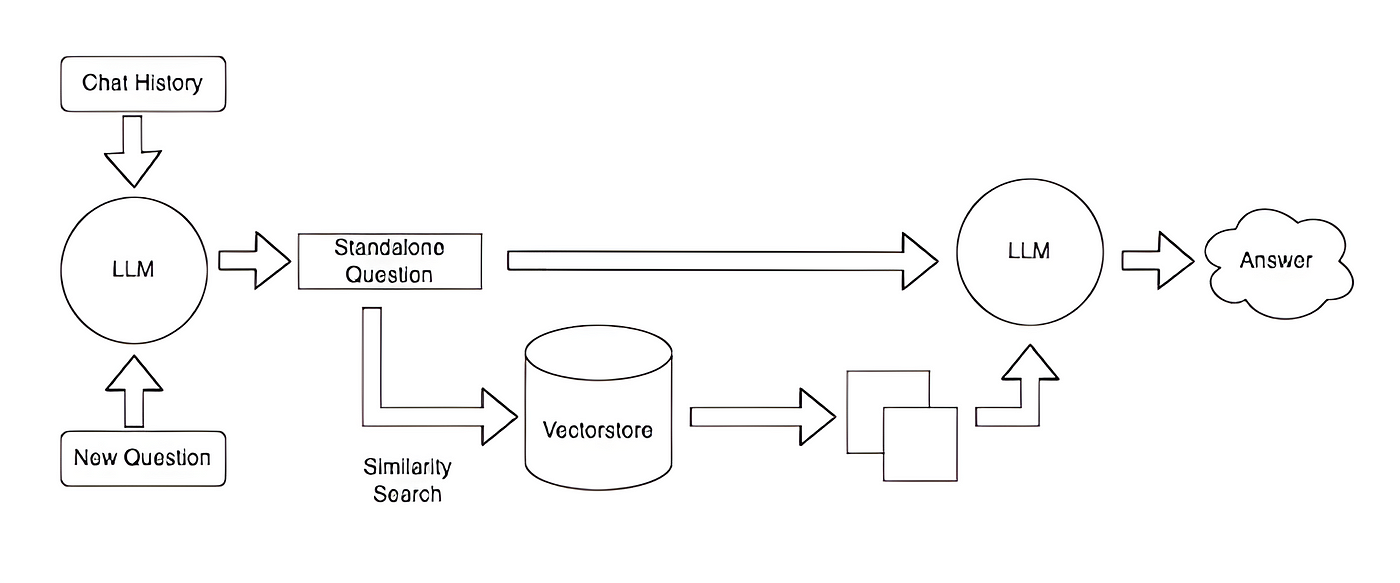

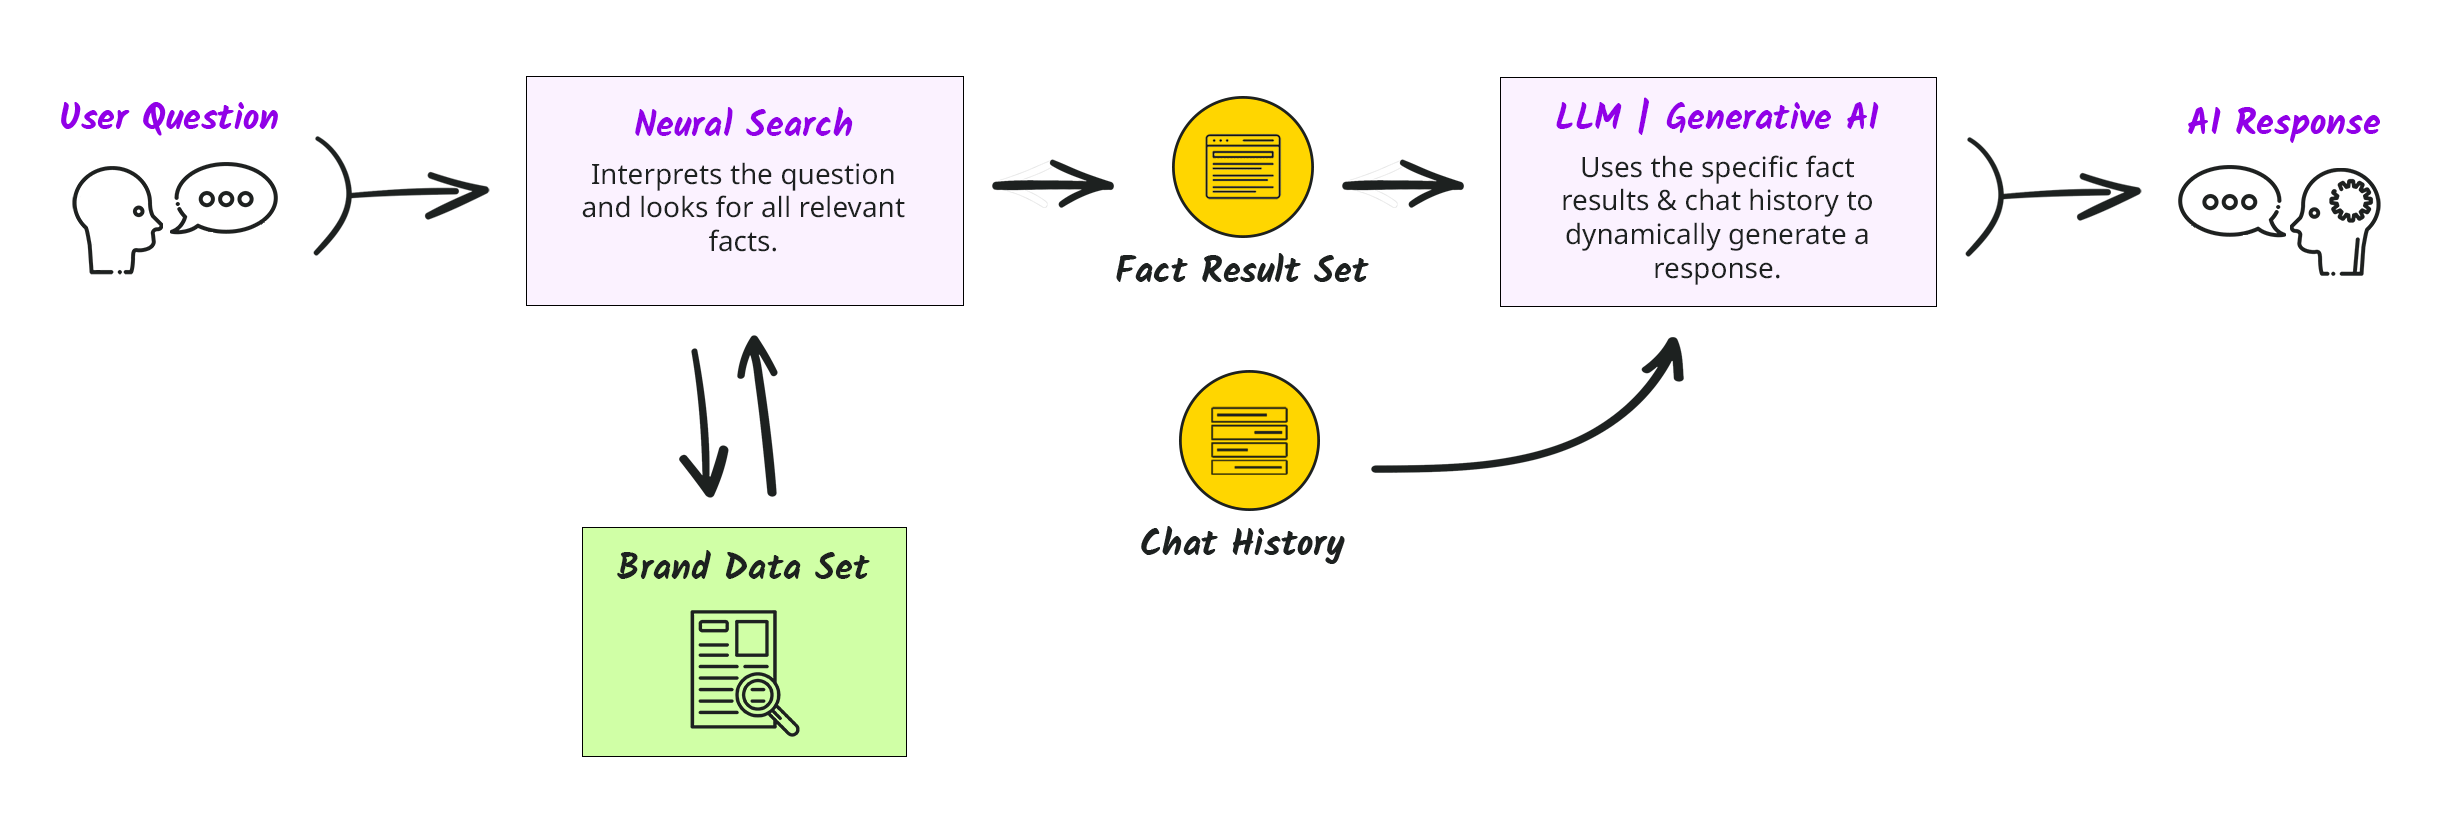

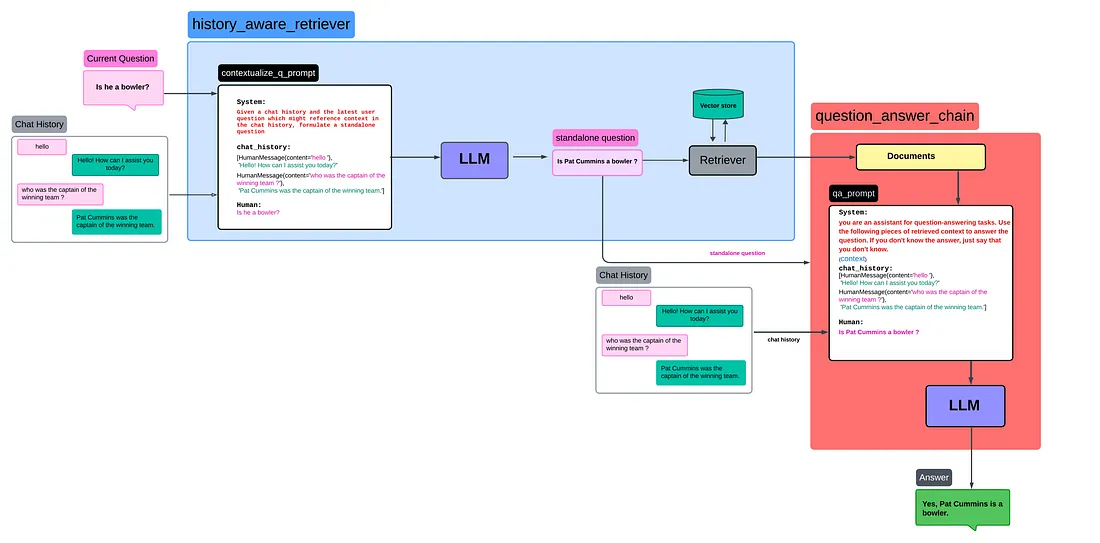

In [ ]:
# result3 = conversational_rag_chain.invoke(
#     {"input": " "},
#     config={"configurable": {"session_id": " "}},
# )

#           conversational_rag_chain = RunnableWithMessageHistory(
#             rag_chain,
#             get_session_history,
#             input_messages_key="input",
#             history_messages_key="chat_history",
#             output_messages_key="answer",
#         )
#                 rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)


#                         history_aware_retriever = create_history_aware_retriever(model,retriever,contextualize_q_prompt) 

#                                 contextualize_q_prompt  = ChatPromptTemplate.from_messages(
#                                                                 [
#                                                                     ("system", retriever_prompt),
#                                                                     MessagesPlaceholder(variable_name="chat_history"),
#                                                                     ("human", "{input}"),


#                                                                 ]
#                                                             )
                                            # retriever_prompt = (
                                                    #     "Given a chat history and the latest user question which might reference context in the chat history,"
                                                    #     "formulate a standalone question which can be understood without the chat history."
                                                    #     "Do NOT answer the question, just reformulate it if needed and otherwise return it as it is."
                                                    # )


#                         question_answer_chain = create_stuff_documents_chain(model, qa_prompt)

#                                 qa_prompt = ChatPromptTemplate.from_messages(
#                                                 [
#                                                     ("system", system_prompt), # context get from history aware retriever
#                                                     MessagesPlaceholder("chat_history"),
#                                                     ("human", "{input}"), 
#                                                 ]
                                            # )
                                            #  system_prompt = (
                                                        # "You are an assistant for question-answering tasks. "
                                                        # "Use the following pieces of retrieved context to answer the question "
                                                        # "If you don't know the answer, say that you don't know."
                                                        # "Use three sentences maximum and keep the answer concise."
                                                        # "\n\n"
                                                        # "{context}" # context get from history aware retriever
                                                    # )
                                            # 
                                            
                                            
                                            
#                 def get_session_history(session_id: str) -> BaseChatMessageHistory:
#                         if session_id not in store:
#                             store[session_id] = ChatMessageHistory()
#                         return store[session_id]    

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"] = "chatbot_with_langchain"
os.environ["GOOGLE_API_KEY"] = os.environ["GEMINI_API_KEY"]

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = ChatGoogleGenerativeAI(model="gemini-pro",convert_system_message_to_human=True)

In [4]:

from langchain_google_genai import GoogleGenerativeAIEmbeddings
gemini_embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:

print(model.invoke("hi").content)

Hello there! How can I help you today?


In [7]:

import bs4 # beautiful soup
from langchain import hub

In [8]:

from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_chroma import Chroma
from langchain_community.document_loaders import WebBaseLoader
from langchain_core.prompts import ChatPromptTemplate
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.prompts import MessagesPlaceholder

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [15]:
loader = WebBaseLoader(web_paths=("https://blogs.nvidia.com/blog/what-is-agentic-ai/",),bs_kwargs=dict(parse_only=bs4.SoupStrainer(class_=("entry-content", "entry-title", "entry-header"))),)
     

In [ ]:
# WebBaseLoader
# This line creates an instance of WebBaseLoader, a class used to load web pages.
# Parameters:
# web_paths: A tuple of URLs to load. In this case, it's a single URL: https://blogs.nvidia.com/blog/what-is-agentic-ai/.
# bs_kwargs: A dictionary of keyword arguments to pass to the BeautifulSoup parser.
# BeautifulSoup Parser Configuration:
# parse_only: Specifies a SoupStrainer object to filter the parsed HTML.
# class_: Specifies a tuple of CSS classes to filter by. In this case, it's filtering by the classes post-content, post-title, and post-header.
# Purpose:
# The purpose of this code is to:
# Load the specified web page.
# Parse the HTML content using BeautifulSoup.
# Filter the parsed HTML to only include elements with the specified CSS classes.

In [16]:

doc = loader.load()

In [17]:
doc

[Document(metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='\n\n\nWhat Is Agentic AI?\xa0\n\n\n\t\t\t\tAgentic AI uses sophisticated reasoning and iterative planning to autonomously solve complex, multi-step problems.\t\t\t\n\n\nOctober 22, 2024 by Erik Pounds \n\n\n\n\n\n\n  Editor’s note: The name of NIM Agent Blueprints was changed to NVIDIA\xa0Blueprints in October 2024. All references to the name have been updated in this blog.\nAI chatbots use generative AI to provide responses based on a single interaction. A person makes a query and the chatbot uses natural language processing to reply.\nThe next frontier of artificial intelligence is agentic AI, which uses sophisticated reasoning and iterative planning to autonomously solve complex, multi-step problems. And it’s set to enhance productivity and operations across industries.\nAn AI agent for customer service, for instance, could operate beyond simple question-answering. With agentic AI, it c

In [18]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
splits = text_splitter.split_documents(doc)

In [19]:
text_splitter

In [20]:
splits

[Document(metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='What Is Agentic AI?\xa0\n\n\n\t\t\t\tAgentic AI uses sophisticated reasoning and iterative planning to autonomously solve complex, multi-step problems.\t\t\t\n\n\nOctober 22, 2024 by Erik Pounds'),
 Document(metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='Editor’s note: The name of NIM Agent Blueprints was changed to NVIDIA\xa0Blueprints in October 2024. All references to the name have been updated in this blog.\nAI chatbots use generative AI to provide responses based on a single interaction. A person makes a query and the chatbot uses natural language processing to reply.'),
 Document(metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='The next frontier of artificial intelligence is agentic AI, which uses sophisticated reasoning and iterative planning to autonomously solve complex, multi-step problems. And it’s s

In [21]:
vectorstore = Chroma.from_documents(documents=splits, embedding=gemini_embeddings)
retriever = vectorstore.as_retriever()

In [23]:
vectorstore

In [22]:
retriever

VectorStoreRetriever(tags=['Chroma', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x000001C84CE58B50>, search_kwargs={})

In [24]:

system_prompt = (
    "You are an assistant for question-answering tasks. "
    "Use the following pieces of retrieved context to answer the question "
    "If you don't know the answer, say that you don't know."
    "Use three sentences maximum and keep the answer concise."
    "\n\n"
    "{context}"
)

In [25]:
chat_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

In [26]:
question_answering_chain=create_stuff_documents_chain(model, chat_prompt)

In [28]:
question_answering_chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question If you don't know the answer, say that you don't know.Use three sentences maximum and keep the answer concise.\n\n{context}"), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_

In [27]:
rag_chain = create_retrieval_chain(retriever, question_answering_chain)

In [29]:
rag_chain

RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableLambda(lambda x: x['input'])
           | VectorStoreRetriever(tags=['Chroma', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x000001C84CE58B50>, search_kwargs={}), kwargs={}, config={'run_name': 'retrieve_documents'}, config_factories=[])
})
| RunnableAssign(mapper={
    answer: RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
              context: RunnableLambda(format_docs)
            }), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
            | ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question If you don't k

In [30]:
response = rag_chain.invoke({"input":"What Is Agentic AI?"})

In [31]:
response

{'input': 'What Is Agentic AI?',
 'context': [Document(id='8863c053-5eef-4d19-b49a-b8062cfae980', metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='Act: By integrating with external tools and software via application programming interfaces, agentic AI can quickly execute tasks based on the plans it has formulated. Guardrails can be built into AI agents to help ensure they execute tasks correctly. For example, a customer service AI agent may be able to process claims up to a certain amount, while claims above the amount would have to be approved by a human.\nLearn: Agentic AI continuously improves through a feedback loop, or'),
  Document(id='c805b9a2-19c9-4dd7-9bab-cc2b51e30c30', metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='Agentic AI uses sophisticated reasoning and iterative planning to solve complex, multi-step problems.\nHow Does Agentic AI Work?\nAgentic AI uses a four-step process for problem-solving

In [32]:
response2 = rag_chain.invoke({"input":"How Does Agentic AI Work?"})

In [33]:
response2

{'input': 'How Does Agentic AI Work?',
 'context': [Document(id='c805b9a2-19c9-4dd7-9bab-cc2b51e30c30', metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='Agentic AI uses sophisticated reasoning and iterative planning to solve complex, multi-step problems.\nHow Does Agentic AI Work?\nAgentic AI uses a four-step process for problem-solving:'),
  Document(id='8863c053-5eef-4d19-b49a-b8062cfae980', metadata={'source': 'https://blogs.nvidia.com/blog/what-is-agentic-ai/'}, page_content='Act: By integrating with external tools and software via application programming interfaces, agentic AI can quickly execute tasks based on the plans it has formulated. Guardrails can be built into AI agents to help ensure they execute tasks correctly. For example, a customer service AI agent may be able to process claims up to a certain amount, while claims above the amount would have to be approved by a human.\nLearn: Agentic AI continuously improves through a feedback l

In [34]:
response["answer"]

'I do not have the answer to this question. The provided text does not mention anything about how agentic AI interacts with humans.'

In [35]:
response2["answer"]

'Agentic AI uses a four-step process for problem-solving: Act, Learn, Refine, and Execute. It ingests data from multiple sources, analyzes challenges, and develops strategies to execute tasks. Businesses are using agentic AI to personalize customer service, streamline software development, and facilitate patient interactions.'

In [36]:
from langchain.chains import create_history_aware_retriever

In [39]:

chat_history = []

In [37]:
retriever_prompt = (
    "Given a chat history and the latest user question which might reference context in the chat history,"
    "formulate a standalone question which can be understood without the chat history."
    "Do NOT answer the question, just reformulate it if needed and otherwise return it as it is."
)

In [38]:
contextualize_q_prompt  = ChatPromptTemplate.from_messages(
    [
        ("system", retriever_prompt),
        MessagesPlaceholder(variable_name="chat_history"),
        ("human", "{input}"),


     ]
)

In [41]:
contextualize_q_prompt

ChatPromptTemplate(input_variables=['chat_history', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[l

to create a standalone question with chat history and new question

In [40]:
history_aware_retriever = create_history_aware_retriever(model,retriever,contextualize_q_prompt) 

In [42]:
history_aware_retriever # to create a standalone question not answer

RunnableBinding(bound=RunnableBranch(branches=[(RunnableLambda(lambda x: not x.get('chat_history', False)), RunnableLambda(lambda x: x['input'])
| VectorStoreRetriever(tags=['Chroma', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x000001C84CE58B50>, search_kwargs={}))], default=ChatPromptTemplate(input_variables=['chat_history', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='A

In [43]:
from langchain.chains import create_retrieval_chain

to retrieve answers with standalone question

In [44]:
from langchain.chains.combine_documents import create_stuff_documents_chain

In [45]:
qa_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder("chat_history"),
        ("human", "{input}"),
    ]
)
 

In [47]:
qa_prompt

ChatPromptTemplate(input_variables=['chat_history', 'context', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.

In [46]:
question_answer_chain = create_stuff_documents_chain(model, qa_prompt)

In [48]:
question_answering_chain

RunnableBinding(bound=RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableLambda(format_docs)
}), kwargs={}, config={'run_name': 'format_inputs'}, config_factories=[])
| ChatPromptTemplate(input_variables=['context', 'input'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question If you don't know the answer, say that you don't know.Use three sentences maximum and keep the answer concise.\n\n{context}"), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={})])
| ChatGoogleGenerativeAI(model='models/gemini-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_

In [49]:
rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

In [50]:
rag_chain

RunnableBinding(bound=RunnableAssign(mapper={
  context: RunnableBinding(bound=RunnableBranch(branches=[(RunnableLambda(lambda x: not x.get('chat_history', False)), RunnableLambda(lambda x: x['input'])
           | VectorStoreRetriever(tags=['Chroma', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_chroma.vectorstores.Chroma object at 0x000001C84CE58B50>, search_kwargs={}))], default=ChatPromptTemplate(input_variables=['chat_history', 'input'], input_types={'chat_history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], ty

In [51]:
from langchain_core.messages import HumanMessage, AIMessage

In [52]:

question1 = "how to fueling Agentic AI With Enterprise Data?"

In [53]:

message1= rag_chain.invoke({"input": question1, "chat_history": chat_history})

In [54]:
message1["answer"]

'Agentic AI is fueled by enterprise data by ingesting vast amounts of data from multiple data sources and third-party applications. \nThis data is then analyzed independently to develop strategies and execute tasks. \nBusinesses are implementing agentic AI to personalize customer service, streamline software development, and facilitate patient interactions.'

In [55]:
chat_history.extend(
    [
        HumanMessage(content=question1),
        AIMessage(content=message1["answer"]),
    ]
)

In [56]:
chat_history

[HumanMessage(content='how to fueling Agentic AI With Enterprise Data?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Agentic AI is fueled by enterprise data by ingesting vast amounts of data from multiple data sources and third-party applications. \nThis data is then analyzed independently to develop strategies and execute tasks. \nBusinesses are implementing agentic AI to personalize customer service, streamline software development, and facilitate patient interactions.', additional_kwargs={}, response_metadata={})]

In [57]:

second_question = "What are common ways of doing it?"
message2 = rag_chain.invoke({"input": second_question, "chat_history": chat_history})

print(message2["answer"])

Common ways of fueling Agentic AI with enterprise data include:

* **Integrating with data warehouses and data lakes:** This allows Agentic AI to access large volumes of structured and unstructured data.
* **Connecting to SaaS applications:** This allows Agentic AI to access data from customer relationship management (CRM), enterprise resource planning (ERP), and other business applications.
* **Using APIs to access data from third-party sources:** This allows Agentic AI to access data from a wide range of sources, such as social media platforms, financial data providers, and weather services.

By integrating with a variety of data sources, Agentic AI can gain a comprehensive understanding of the business and its customers. This data can then be used to develop more accurate and effective strategies and to automate a wider range of tasks.


In [58]:

from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [59]:
store = {}

In [60]:
def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = ChatMessageHistory()
    return store[session_id]

In [61]:
conversational_rag_chain = RunnableWithMessageHistory(
    rag_chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer",
)

In [64]:

result = conversational_rag_chain.invoke(
    {"input": "How agentic ai help in real life application ?"},
    config={
        "configurable": {"session_id": "abc123"}
    },  # constructs a key "abc123" in `store`.
)

In [65]:
result

{'input': 'How agentic ai help in real life application ?',
 'chat_history': [HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can persona

In [66]:
result["answer"]

'Agentic AI finds applications in various domains, including:\n\n* **Customer service:** Personalizing interactions, resolving issues efficiently, and providing tailored responses.\n* **Software development:** Automating tasks like code generation, testing, and deployment, streamlining development processes.\n* **Healthcare:** Facilitating patient interactions, providing virtual assistance, scheduling appointments, and managing medical records.\n* **Finance:** Automating tasks like fraud detection, risk assessment, and portfolio management, improving efficiency and accuracy.\n* **Education:** Personalizing learning experiences, providing adaptive content, and automating administrative tasks, enhancing student engagement and outcomes.'

In [67]:
store

{'abc123': InMemoryChatMessageHistory(messages=[HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}), AIMessage(content="Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.", additional_kwargs={}, response_metadata={}), HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}), AIMessage(content='Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can personalize interactions by analyzing custo

In [68]:
result2 = conversational_rag_chain.invoke(
    {"input": "explain in detail how to implement those  ?"},
    config={"configurable": {"session_id": "abc123"}},
)

In [69]:
result2

{'input': 'explain in detail how to implement those  ?',
 'chat_history': [HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can personaliz

In [70]:
result2["answer"]

"**Implementing Agentic AI in Real-Life Applications**\n\n**1. Define the problem and scope:** Clearly identify the specific problem or task that you want the agentic AI to address, as well as the desired outcomes and constraints.\n\n**2. Gather and prepare data:** Collect relevant data from various sources, such as customer records, transaction logs, and sensor data. Clean and preprocess the data to ensure its quality and suitability for training the AI model.\n\n**3. Choose an appropriate AI platform:** Select an AI platform that provides the necessary tools and infrastructure for developing and deploying agentic AI models. Consider factors such as scalability, flexibility, and ease of use.\n\n**4. Design and train the AI model:** Design the agentic AI model's architecture, including the input features, output actions, and decision-making logic. Train the model using the prepared data, iteratively refining its parameters to optimize performance.\n\n**5. Integrate with external system

In [71]:
result3 = conversational_rag_chain.invoke(
    {"input": "explain in detail which points you are mentioned   ?"},
    config={"configurable": {"session_id": "abc123"}},
)

In [72]:
result3

{'input': 'explain in detail which points you are mentioned   ?',
 'chat_history': [HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.", additional_kwargs={}, response_metadata={}),
  HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can p

In [73]:
result3["answer"]

"**Points Mentioned for Implementing Agentic AI**\n\n**1. Define the problem and scope:**\n* Clearly identify the specific problem or task that the agentic AI will address.\n* Determine the desired outcomes and constraints of the AI system.\n\n**2. Gather and prepare data:**\n* Collect relevant data from various sources, such as customer records, transaction logs, and sensor data.\n* Clean and preprocess the data to ensure its quality and suitability for training the AI model.\n\n**3. Choose an appropriate AI platform:**\n* Select an AI platform that provides the necessary tools and infrastructure for developing and deploying agentic AI models.\n* Consider factors such as scalability, flexibility, and ease of use.\n\n**4. Design and train the AI model:**\n* Design the agentic AI model's architecture, including the input features, output actions, and decision-making logic.\n* Train the model using the prepared data, iteratively refining its parameters to optimize performance.\n\n**5. In

In [74]:
store

{'abc123': InMemoryChatMessageHistory(messages=[HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}), AIMessage(content="Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.", additional_kwargs={}, response_metadata={}), HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}), AIMessage(content='Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can personalize interactions by analyzing custo

In [75]:

for message in store["abc123"].messages:
    if isinstance(message, AIMessage):
        prefix = "AI"
    else:
        prefix = "User"

    print(f"{prefix}: {message.content}\n")

User: How agentic ai help in real life application ?

AI: Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.

User: How agentic ai help in real life application ?

AI: Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can personalize interactions by analyzing customer data and preferences, providing tailored responses, and resolving issues efficiently. In software development, it can streamline processes by automating tasks such as code generation, testing, and deployment. In healthcare, it can facilitate pa

In [76]:
conversational_rag_chain.invoke(
    {"input": "What is a prompt technique like step xyz?"},
    config={"configurable": {"session_id": "abc123"}},
)["answer"]

'**Prompt engineering** is a technique used in natural language processing (NLP) to improve the performance of language models by providing them with additional information or instructions in the form of a prompt. \n\n**Step-by-Step Prompt Engineering Technique**\n\n**Step 1: Define the task and desired outcome.**\nClearly identify the specific task that you want the language model to perform and the desired output.\n\n**Step 2: Gather relevant information.**\nCollect any relevant information that can help the language model understand the context and requirements of the task. This may include background knowledge, examples, or constraints.\n\n**Step 3: Craft the prompt.**\nWrite a clear and concise prompt that provides the language model with the necessary instructions and information. The prompt should include the following elements:\n    * **Task description:** Briefly describe the task that the language model should perform.\n    * **Input:** Specify the input that the language mod

In [77]:

store


{'abc123': InMemoryChatMessageHistory(messages=[HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}), AIMessage(content="Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.", additional_kwargs={}, response_metadata={}), HumanMessage(content='How agentic ai help in real life application ?', additional_kwargs={}, response_metadata={}), AIMessage(content='Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can personalize interactions by analyzing custo

In [78]:

for message in store["abc123"].messages:
    if isinstance(message, AIMessage):
        prefix = "AI"
    else:
        prefix = "User"

    print(f"{prefix}: {message.content}\n")

User: How agentic ai help in real life application ?

AI: Agentic AI finds applications in various industries, including customer service, software development, and healthcare. It can perform tasks such as personalizing customer interactions, streamlining software development, and facilitating patient interactions. Agentic AI's ability to integrate with external tools and software via application programming interfaces (APIs) enables it to execute tasks based on its formulated plans.

User: How agentic ai help in real life application ?

AI: Agentic AI finds applications in various industries, including customer service, software development, and healthcare. For instance, in customer service, it can personalize interactions by analyzing customer data and preferences, providing tailored responses, and resolving issues efficiently. In software development, it can streamline processes by automating tasks such as code generation, testing, and deployment. In healthcare, it can facilitate pa

rough workflow

In [ ]:
# result3 = conversational_rag_chain.invoke(
#     {"input": " "},
#     config={"configurable": {"session_id": " "}},
# )

#           conversational_rag_chain = RunnableWithMessageHistory(
#             rag_chain,
#             get_session_history,
#             input_messages_key="input",
#             history_messages_key="chat_history",
#             output_messages_key="answer",
#         )
#                 rag_chain = create_retrieval_chain(history_aware_retriever, question_answer_chain)

#                         question_answer_chain = create_stuff_documents_chain(model, qa_prompt)

#                                 qa_prompt = ChatPromptTemplate.from_messages(
#                                                 [
#                                                     ("system", system_prompt),
#                                                     MessagesPlaceholder("chat_history"),
#                                                     ("human", "{input}"),
#                                                 ]
#                                             )

#                         history_aware_retriever = create_history_aware_retriever(model,retriever,contextualize_q_prompt) 

#                                 contextualize_q_prompt  = ChatPromptTemplate.from_messages(
#                                                                 [
#                                                                     ("system", retriever_prompt),
#                                                                     MessagesPlaceholder(variable_name="chat_history"),
#                                                                     ("human", "{input}"),


#                                                                 ]
#                                                             )

#                 def get_session_history(session_id: str) -> BaseChatMessageHistory:
#                         if session_id not in store:
#                             store[session_id] = ChatMessageHistory()
#                         return store[session_id]    